In [116]:
# Import Python packages
import math
import sympy as sm
from sympy import *
import numpy as np
from numpy import *
from fractions import Fraction
import matplotlib.pyplot as plt

Generates random data as $n_{xxxx}, n_{xxxy}, n_{xxyx}, n_{xyxx}, n_{xxyy}, n_{xyxy}, n_{xyyx}, n_{xyyy}$
---------------------

NOTATION: $n_{xxxx}$ is the number of observations taking the values (+1, +1, +1, +1) or (-1, -1, -1, -1), and similarly for the remaining notations.  
Feel free to modify $\theta_{2}$ and $\theta_{3}$ to observe the corresponding changes in the plots

In [117]:
h1_range = np.linspace(0, 1, num=50)  # 0 <= θ1 <= 1
K = 10000 # repetition
data = np.zeros((50,K,8)) # Makes a 50 by K by 8 array to hold random data

for i in range(50):
    h1 = h1_range[i]  # θ1
    h2 = 0.5          # θ2
    h3 = 0.5          # θ3
    
    # Computes the site pattern probabilities
    p_xxxx = 1/8 * (1 + h1*h2 + h1*h3 + h2*h3)
    p_xxxy = 1/8 * (1 + h1*h2 + h1*h3 + h2*h3)
    p_xxyx = 1/8 * (1 + h1*h2 - h1*h3 - h2*h3)
    p_xyxx = 1/8 * (1 - h1*h2 + h1*h3 - h2*h3)
    p_xxyy = 1/8 * (1 + h1*h2 - h1*h3 - h2*h3)
    p_xyxy = 1/8 * (1 - h1*h2 + h1*h3 - h2*h3)
    p_xyyx = 1/8 * (1 - h1*h2 - h1*h3 + h2*h3)
    p_xyyy = 1/8 * (1 - h1*h2 - h1*h3 + h2*h3)

    # Generates samples from the multinomial distribution
    # 10000 trials, size = K
    data[i] = np.random.multinomial(10000, [p_xxxx]*1 + [p_xxxy]*1 + [p_xxyx]*1 + [p_xyxx]*1 + [p_xxyy]*1 + [p_xyxy]*1 + [p_xyyx]*1 + [p_xyyy]*1, size=K)
print(data)

[[[1543. 1600.  948. ...  970. 1543. 1551.]
  [1581. 1546.  895. ...  875. 1611. 1611.]
  [1536. 1591.  916. ...  966. 1557. 1560.]
  ...
  [1537. 1623.  905. ...  950. 1515. 1599.]
  [1548. 1563.  981. ...  928. 1494. 1546.]
  [1520. 1544.  976. ...  908. 1574. 1525.]]

 [[1575. 1646.  968. ...  915. 1505. 1484.]
  [1610. 1592.  933. ...  951. 1531. 1521.]
  [1549. 1640.  970. ...  915. 1493. 1561.]
  ...
  [1566. 1580.  921. ...  962. 1513. 1547.]
  [1600. 1638.  918. ...  911. 1552. 1562.]
  [1575. 1629.  875. ... 1002. 1537. 1520.]]

 [[1622. 1635.  902. ...  945. 1519. 1542.]
  [1639. 1667.  949. ...  917. 1516. 1482.]
  [1734. 1592.  939. ...  928. 1428. 1551.]
  ...
  [1569. 1607.  949. ...  946. 1557. 1479.]
  [1686. 1583.  928. ...  943. 1505. 1532.]
  [1601. 1627.  931. ...  928. 1533. 1532.]]

 ...

 [[2761. 2746.  900. ...  955.  364.  413.]
  [2812. 2654.  932. ...  974.  360.  328.]
  [2744. 2736.  962. ...  906.  390.  329.]
  ...
  [2757. 2793.  952. ...  928.  355.  33

Finds $θ$ and $δ$ that achieves the maximum likelihood
---------------------

In [118]:
# Reference: https://en.wikipedia.org/wiki/Newton%27s_method
def newtons_method(
    x0,               # The initial guess
    f,                # The function whose root we are trying to find
    f_prime,          # The derivative of the function
    tolerance,        # 7-digit accuracy is desired
    epsilon,          # Do not divide by a number smaller than this
    max_iterations,   # The maximum number of iterations to execute
    ):
    for i in range(max_iterations):
        y = f(x0)
        yprime = f_prime(x0)

        if abs(yprime) < epsilon:       # Stop if the denominator is too small
            break

        x1 = x0 - y / yprime            # Do Newton's computation

        if abs(x1 - x0) <= tolerance:   # Stop when the result is within the desired tolerance
            return x1                   # x1 is a solution within tolerance and maximum number of iterations

        x0 = x1                         # Update x0 to start the process again

    return None                         # Newton's method did not converge


In [119]:
# Defines notations to simplify expression for case 1 (branch 2 wins)
def expr1_A(h1, h, h3, t):
    return h1*(t/h) + h + h3*(t/h) + h1*h*h3

def expr1_B(h1, h, h3, t):
    return h1*(t/h) + h - h3*(t/h) - h1*h*h3

def expr1_C(h1, h, h3, t):
    return h1*(t/h) - h + h3*(t/h) - h1*h*h3

def expr1_D(h1, h, h3, t):
    return h1*(t/h) - h - h3*(t/h) + h1*h*h3

def expr1_P(h1, h, h3, t):
    return 1 + h1*t + h1*h3 + t*h3

def expr1_Q(h1, h, h3, t):
    return 1 + h1*t - h1*h3 - t*h3

def expr1_R(h1, h, h3, t):
    return 1 - h1*t + h1*h3 - t*h3

def expr1_S(h1, h, h3, t):
    return 1 - h1*t - h1*h3 + t*h3

In [120]:
# Defines notations to simplify expression for case 2 (branch 3 wins)
def expr2_A(h1, h, h2, t):
    return h1*(t/h) + h + h2*(t/h) + h1*h*h2

def expr2_B(h1, h, h2, t):
    return h1*(t/h) - h + h2*(t/h) - h1*h*h2

def expr2_C(h1, h, h2, t):
    return h1*(t/h) + h - h2*(t/h) - h1*h*h2

def expr2_D(h1, h, h2, t):
    return h1*(t/h) - h - h2*(t/h) + h1*h*h2

def expr2_P(h1, h, h2, t):
    return 1 + h1*t + h1*h2 + t*h2

def expr2_Q(h1, h, h2, t):
    return 1 - h1*t + h1*h2 - t*h2

def expr2_R(h1, h, h2, t):
    return 1 + h1*t - h1*h2 - t*h2

def expr2_S(h1, h, h2, t):
    return 1 - h1*t - h1*h2 + t*h2

In [121]:
# Defines notations to simplify expression for case 3 (branch 1 wins)
def expr3_A(h3, h, h2, t):
    return h2*(t/h) + h + h3*(t/h) + h*h2*h3

def expr3_B(h3, h, h2, t):
    return h2*(t/h) + h - h3*(t/h) - h*h2*h3

def expr3_C(h3, h, h2, t):
    return h2*(t/h) - h - h3*(t/h) + h*h2*h3

def expr3_D(h3, h, h2, t):
    return h2*(t/h) - h + h3*(t/h) - h*h2*h3

def expr3_P(h3, h, h2, t):
    return 1 + h2*t + h2*h3 + t*h3

def expr3_Q(h3, h, h2, t):
    return 1 + h2*t - h2*h3 - t*h3

def expr3_R(h3, h, h2, t):
    return 1 - h2*t - h2*h3 + t*h3

def expr3_S(h3, h, h2, t):
    return 1 - h2*t + h2*h3 - t*h3

In [122]:
# Creates lists to store computed θ
# case 1:
theta_2 = []                             # The list of θ2 that achieves the maximum likelihood in case 1
for i in range(50):
    theta_2.append([])
theta_2_unique = []                      # The list of unique θ2 (θ2!=τ) that achieves the maximum likelihood in case 1
for i in range(50):
    theta_2_unique.append([])

# case 2:
theta_3 = []                             # The list of θ3 that achieves the maximum likelihood in case 2
for i in range(50):
    theta_3.append([])
theta_3_unique = []                      # The list of unique θ3 (θ3!=τ) that achieves the maximum likelihood in case 2
for i in range(50):
    theta_3_unique.append([])

# case 3:
theta_1 = []                             # The list of θ1 that achieves the maximum likelihood in case 3
for i in range(50):
    theta_1.append([])
theta_1_unique = []                      # The list of unique θ1 (θ1!=τ) that achieves the maximum likelihood in case 3
for i in range(50):
    theta_1_unique.append([])

cnt_0 = [0 for element in range(50)]     # The counts of instances where δ = 0
cnt_1 = [0 for element in range(50)]     # The counts of instances where branch 1 wins
cnt_2 = [0 for element in range(50)]     # The counts of instances where branch 2 wins
cnt_3 = [0 for element in range(50)]     # The counts of instances where branch 3 wins
cnt_4 = [0 for element in range(50)]     # The counts of instances where star wins

In [123]:
array = np.linspace(0.25, 1, num=100)  # τ < θ < 1, τ = 0.25
init = 0.05
tolerance = 0.0001
epsilon = 0.001
max_iterations = 10000

# Global Optimization
# The outer loop iterates through 50 datasets, with each dataset generated previously using a distinct value of θ1, 
# where 0 < θ1 < 1. The inner loop processes K sets of random data within each dataset.
for u in range(50):
    for j in range(K):
        y1 = []           # δ (case 1)
        y2 = []           # δ (case 2)
        y3 = []           # δ (case 3)
        z1 = []           # log likelihood (case 1)
        z2 = []           # log likelihood (case 2)
        z3 = []           # log likelihood (case 3)
        A = data[u][j][0] # n_xxxx
        B = data[u][j][1] # n_xxxy
        C = data[u][j][2] # n_xxyx
        D = data[u][j][3] # n_xyxx
        E = data[u][j][4] # n_xxyy
        F = data[u][j][5] # n_xyxy
        G = data[u][j][6] # n_xyyx
        H = data[u][j][7] # n_xyyy
        t = 0.25          # τ
        h1 = 0.5          # θ_1
        h2 = 0.5          # θ_2
        h3 = 0.5          # θ_3
        d = symbols('d')  # δ
    
        def get_delta(
            case_number,      # Case number
            y,                # The list to store computed δ corresponding to each θ
            ):
            """
            For each τ < θ < 1, find δ that achieves the maximum likelihood by 
            identifying critical points in the first derivative of log likelihood function w.r.t. δ.
            We apply Newton's Method to solve the equation.
            """
            for h in array:
                if case_number == 1:
                    # the first derivative of log likelihood function w.r.t. δ.
                    def df(d):
                        return A*expr1_A(h1, h, h3, t)/(expr1_P(h1, h, h3, t) + expr1_A(h1, h, h3, t)*d) - B*expr1_A(h1, h, h3, t)/(expr1_P(h1, h, h3, t) - expr1_A(h1, h, h3, t)*d) + C*expr1_B(h1, h, h3, t)/(expr1_Q(h1, h, h3, t) + expr1_B(h1, h, h3, t)*d) - E*expr1_B(h1, h, h3, t)/(expr1_Q(h1, h, h3, t) - expr1_B(h1, h, h3, t)*d) + D*expr1_C(h1, h, h3, t)/(expr1_R(h1, h, h3, t) + expr1_C(h1, h, h3, t)*d) - F*expr1_C(h1, h, h3, t)/(expr1_R(h1, h, h3, t) - expr1_C(h1, h, h3, t)*d) + G*expr1_D(h1, h, h3, t)/(expr1_S(h1, h, h3, t) + expr1_D(h1, h, h3, t)*d) - H*expr1_D(h1, h, h3, t)/(expr1_S(h1, h, h3, t) - expr1_D(h1, h, h3, t)*d)
                    # the second derivative of log likelihood function w.r.t. δ.
                    def d2f(d): 
                        return -A*pow(expr1_A(h1, h, h3, t),2)/pow((expr1_P(h1, h, h3, t) + expr1_A(h1, h, h3, t)*d),2) - B*pow(expr1_A(h1, h, h3, t),2)/pow((expr1_P(h1, h, h3, t) - expr1_A(h1, h, h3, t)*d),2) - C*pow(expr1_B(h1, h, h3, t),2)/pow((expr1_Q(h1, h, h3, t) + expr1_B(h1, h, h3, t)*d),2) - E*pow(expr1_B(h1, h, h3, t),2)/pow((expr1_Q(h1, h, h3, t) - expr1_B(h1, h, h3, t)*d),2) - D*pow(expr1_C(h1, h, h3, t),2)/pow((expr1_R(h1, h, h3, t) + expr1_C(h1, h, h3, t)*d),2) - F*pow(expr1_C(h1, h, h3, t),2)/pow((expr1_R(h1, h, h3, t) - expr1_C(h1, h, h3, t)*d),2) - G*pow(expr1_D(h1, h, h3, t),2)/pow((expr1_S(h1, h, h3, t) + expr1_D(h1, h, h3, t)*d),2) - H*pow(expr1_D(h1, h, h3, t),2)/pow((expr1_S(h1, h, h3, t) - expr1_D(h1, h, h3, t)*d),2)
                elif case_number == 2:
                    def df(d):
                        return A*expr2_A(h1, h, h2, t)/(expr2_P(h1, h, h2, t) + expr2_A(h1, h, h2, t)*d) - B*expr2_A(h1, h, h2, t)/(expr2_P(h1, h, h2, t) - expr2_A(h1, h, h2, t)*d) + C*expr2_B(h1, h, h2, t)/(expr2_Q(h1, h, h2, t) + expr2_B(h1, h, h2, t)*d) - E*expr2_B(h1, h, h2, t)/(expr2_Q(h1, h, h2, t) - expr2_B(h1, h, h2, t)*d) + D*expr2_C(h1, h, h2, t)/(expr2_R(h1, h, h2, t) + expr2_C(h1, h, h2, t)*d) - F*expr2_C(h1, h, h2, t)/(expr2_R(h1, h, h2, t) - expr2_C(h1, h, h2, t)*d) + G*expr2_D(h1, h, h2, t)/(expr2_S(h1, h, h2, t) + expr2_D(h1, h, h2, t)*d) - H*expr2_D(h1, h, h2, t)/(expr2_S(h1, h, h2, t) - expr2_D(h1, h, h2, t)*d)
                    def d2f(d):
                        return -A*pow(expr2_A(h1, h, h2, t),2)/pow((expr2_P(h1, h, h2, t) + expr2_A(h1, h, h2, t)*d),2) - B*pow(expr2_A(h1, h, h2, t),2)/pow((expr2_P(h1, h, h2, t) - expr2_A(h1, h, h2, t)*d),2) - C*pow(expr2_B(h1, h, h2, t),2)/pow((expr2_Q(h1, h, h2, t) + expr2_B(h1, h, h2, t)*d),2) - E*pow(expr2_B(h1, h, h2, t),2)/pow((expr2_Q(h1, h, h2, t) - expr2_B(h1, h, h2, t)*d),2) - D*pow(expr2_C(h1, h, h2, t),2)/pow((expr2_R(h1, h, h2, t) + expr2_C(h1, h, h2, t)*d),2) - F*pow(expr2_C(h1, h, h2, t),2)/pow((expr2_R(h1, h, h2, t) - expr2_C(h1, h, h2, t)*d),2) - G*pow(expr2_D(h1, h, h2, t),2)/pow((expr2_S(h1, h, h2, t) + expr2_D(h1, h, h2, t)*d),2) - H*pow(expr2_D(h1, h, h2, t),2)/pow((expr2_S(h1, h, h2, t) - expr2_D(h1, h, h2, t)*d),2)
                elif case_number == 3:
                    def df(d):
                        return A*expr3_A(h3, h, h2, t)/(expr3_P(h3, h, h2, t) + expr3_A(h3, h, h2, t)*d) - B*expr3_A(h3, h, h2, t)/(expr3_P(h3, h, h2, t) - expr3_A(h3, h, h2, t)*d) + C*expr3_B(h3, h, h2, t)/(expr3_Q(h3, h, h2, t) + expr3_B(h3, h, h2, t)*d) - E*expr3_B(h3, h, h2, t)/(expr3_Q(h3, h, h2, t) - expr3_B(h3, h, h2, t)*d) + F*expr3_C(h3, h, h2, t)/(expr3_R(h3, h, h2, t) + expr3_C(h3, h, h2, t)*d) - D*expr3_C(h3, h, h2, t)/(expr3_R(h3, h, h2, t) - expr3_C(h3, h, h2, t)*d) + H*expr3_D(h3, h, h2, t)/(expr3_S(h3, h, h2, t) + expr3_D(h3, h, h2, t)*d) - G*expr3_D(h3, h, h2, t)/(expr3_S(h3, h, h2, t) - expr3_D(h3, h, h2, t)*d)
                    def d2f(d):
                        return -A*pow(expr3_A(h3, h, h2, t),2)/pow((expr3_P(h3, h, h2, t) + expr3_A(h3, h, h2, t)*d),2) - B*pow(expr3_A(h3, h, h2, t),2)/pow((expr3_P(h3, h, h2, t) - expr3_A(h3, h, h2, t)*d),2) - C*pow(expr3_B(h3, h, h2, t),2)/pow((expr3_Q(h3, h, h2, t) + expr3_B(h3, h, h2, t)*d),2) - E*pow(expr3_B(h3, h, h2, t),2)/pow((expr3_Q(h3, h, h2, t) - expr3_B(h3, h, h2, t)*d),2) - F*pow(expr3_C(h3, h, h2, t),2)/pow((expr3_R(h3, h, h2, t) + expr3_C(h3, h, h2, t)*d),2) - D*pow(expr3_C(h3, h, h2, t),2)/pow((expr3_R(h3, h, h2, t) - expr3_C(h3, h, h2, t)*d),2) - H*pow(expr3_D(h3, h, h2, t),2)/pow((expr3_S(h3, h, h2, t) + expr3_D(h3, h, h2, t)*d),2) - G*pow(expr3_D(h3, h, h2, t),2)/pow((expr3_S(h3, h, h2, t) - expr3_D(h3, h, h2, t)*d),2)
                sol = newtons_method(init, df, d2f, tolerance, epsilon, max_iterations)
                y.append(sol) # δ
        
        def get_max_likelihood(
            case_number,
            y,                # The list of δ corresponding to each θ
            z,                # The list of log-likelihood corresponding to each pair of θ and δ
            ):
            """
            Compute the log likelihood produced by each pair of θ and δ. Return the maximum likelihood.
            """
            for i in range(100):
                # Adjusts the calculated δ from get_delta() to fall within the range [0, 1]
                if y[i] <= 0:
                    d = 0
                    y[i] = 0 
                elif y[i] >= 1:
                    d = 1
                    y[i] = 1
                else:
                    d = y[i]
                h = array[i] # θ
                if case_number == 1:
                    # log likelihood function
                    expr_1 = A*math.log(1 + h1*t + h1*h3 + h1*(t/h)*d + t*h3 + h*d + h3*(t/h)*d + h1*h*h3*d, 2) + B*math.log(1 + h1*t + h1*h3 - h1*(t/h)*d + t*h3 - h*d - h3*(t/h)*d - h1*h*h3*d, 2) + C*math.log(1 + h1*t - h1*h3 + h1*(t/h)*d - t*h3 + h*d - h3*(t/h)*d - h1*h*h3*d, 2) + D*math.log(1 - h1*t + h1*h3 + h1*(t/h)*d - t*h3 - h*d + h3*(t/h)*d - h1*h*h3*d, 2) + E*math.log(1 + h1*t - h1*h3 - h1*(t/h)*d - t*h3 - h*d + h3*(t/h)*d + h1*h*h3*d, 2) + F*math.log(1 - h1*t + h1*h3 - h1*(t/h)*d - t*h3 + h*d - h3*(t/h)*d + h1*h*h3*d, 2) + G*math.log(1 - h1*t - h1*h3 + h1*(t/h)*d + t*h3 - h*d - h3*(t/h)*d + h1*h*h3*d, 2) + H*math.log(1 - h1*t - h1*h3 - h1*(t/h)*d + t*h3 + h*d + h3*(t/h)*d - h1*h*h3*d, 2)
                    z.append(expr_1)
                elif case_number == 2:
                    expr_2 = A*math.log(1 + h1*t + h1*h2 + h1*(t/h)*d + t*h2 + h*d + h2*(t/h)*d + h1*h*h2*d, 2) + B*math.log(1 + h1*t + h1*h2 - h1*(t/h)*d + t*h2 - h*d - h2*(t/h)*d - h1*h*h2*d, 2) + C*math.log(1 - h1*t + h1*h2 + h1*(t/h)*d - t*h2 - h*d + h2*(t/h)*d - h1*h*h2*d, 2) + D*math.log(1 + h1*t - h1*h2 + h1*(t/h)*d - t*h2 + h*d - h2*(t/h)*d - h1*h*h2*d, 2) + E*math.log(1 - h1*t + h1*h2 - h1*(t/h)*d - t*h2 + h*d - h2*(t/h)*d + h1*h*h2*d, 2) + F*math.log(1 + h1*t - h1*h2 - h1*(t/h)*d - t*h2 - h*d + h2*(t/h)*d + h1*h*h2*d, 2) + G*math.log(1 - h1*t - h1*h2 + h1*(t/h)*d + t*h2 - h*d - h2*(t/h)*d + h1*h*h2*d, 2) + H*math.log(1 - h1*t - h1*h2 - h1*(t/h)*d + t*h2 + h*d + h2*(t/h)*d - h1*h*h2*d, 2)
                    z.append(expr_2)
                elif case_number == 3:
                    expr_3 = A*math.log(1 + h2*t + h2*h3 + h2*(t/h)*d + t*h3 + h*d + h3*(t/h)*d + h3*h*h2*d, 2) + B*math.log(1 + h2*t + h2*h3 - h2*(t/h)*d + t*h3 - h*d - h3*(t/h)*d - h3*h*h2*d, 2) + C*math.log(1 + h2*t - h2*h3 + h2*(t/h)*d - t*h3 + h*d - h3*(t/h)*d - h3*h*h2*d, 2) + D*math.log(1 - h2*t - h2*h3 - h2*(t/h)*d + t*h3 + h*d + h3*(t/h)*d - h3*h*h2*d, 2) + E*math.log(1 + h2*t - h2*h3 - h2*(t/h)*d - t*h3 - h*d + h3*(t/h)*d + h3*h*h2*d, 2) + F*math.log(1 - h2*t - h2*h3 + h2*(t/h)*d + t*h3 - h*d - h3*(t/h)*d + h3*h*h2*d, 2) + G*math.log(1 - h2*t + h2*h3 - h2*(t/h)*d - t*h3 + h*d - h3*(t/h)*d + h3*h*h2*d, 2) + H*math.log(1 - h2*t + h2*h3 + h2*(t/h)*d - t*h3 - h*d + h3*(t/h)*d - h3*h*h2*d, 2)
                    z.append(expr_3)
            return max(z)

        def max_likelihood_wrapper(
            case_number, 
            y,                # The list to store computed δ
            z,                # The list to store computed log-likelihood
            ):
            """
            Return the maximum likelihood for a given case/configuration.
            """
            get_delta(case_number, y)
            max_likelihood = get_max_likelihood(case_number, y, z)
            return max_likelihood
        
        def build_params(
            max_likelihood,   # Maximum likelihood among three cases
            z,                # The list of log-likelihood corresponding to each pair of θ and δ
            y,                # The list of δ corresponding to each θ
            theta,            # The list of θ that achieves maximum likelihood
            theta_unique,     # The list of unique θ (θ!=τ) that achieves maximum likelihood
            cnt,              # The counts of instances where a given branch wins
            ):
            """
            Construct the list of θ that achieves maximum likelihood. 
            Count the number of instances where branch 1 wins/branch 2 wins/branch 3 wins/δ = 0/star wins
            """
            for k in range(100):
                if max_likelihood == z[k]:
                    theta[u].append(array[k])
                    if y[k] != 0 and array[k] != t:
                        cnt[u] += 1
                        theta_unique[u].append(array[k])
                    if y[k] == 0: # delta = 0
                        cnt_0[u] += 1
                    if array[k] == t:
                        cnt_4[u] += 1
                    break
        
        def global_optimization():
            """
            Determine which case wins and call build_params() accordingly 
            """
            max_likelihood = max(max_likelihood_1, max_likelihood_2, max_likelihood_3)
            print(max_likelihood_1, max_likelihood_2, max_likelihood_3)
            if max_likelihood == max_likelihood_1:
                build_params(max_likelihood, z1, y1, theta_2, theta_2_unique, cnt_1)
            elif max_likelihood == max_likelihood_2:
                build_params(max_likelihood, z2, y2, theta_3, theta_3_unique, cnt_2)
            elif max_likelihood == max_likelihood_3:
                build_params(max_likelihood, z3, y3, theta_1, theta_1_unique, cnt_3)
        
        max_likelihood_1 = max_likelihood_wrapper(1, y1, z1)
        max_likelihood_2 = max_likelihood_wrapper(2, y2, z2)
        max_likelihood_3 = max_likelihood_wrapper(3, y3, z3)
        global_optimization()
        

-198.84039453618516 -254.06252741071626 276.7925796373698
-276.67327761827016 -252.77282761883396 314.0101954801802
-226.91803167233707 -260.9511066132022 270.29689246371777
-315.6553177350022 -246.49333567080635 230.27245505197698
-209.91790800089325 -201.53306585022995 329.0764808114143
-271.879280305777 -263.8783638272698 264.9310356859508
-251.12404415286562 -261.0843271809605 262.14140233007413
-195.0879566737791 -236.3320199361707 294.2412549759777
-277.8563691081537 -260.4247941384425 284.5194424146796
-276.1997056324867 -283.2353191283462 262.1239549240544
-240.92674430351008 -254.17776803799472 236.24614094891385
-232.12404415286562 -269.0623815886828 299.1380933400737
-227.3314982681875 -242.5660855511794 288.23470614896
-157.22136169146722 -169.6240106032501 306.3975330995908
-255.99882366568488 -276.8202427044813 239.60309650969754
-280.8037441586349 -291.59471913988466 237.09983049567927
-246.36834752529398 -309.8924565872404 250.8232049384779
-255.59170660166353 -220.7285

-220.3232269789413 -225.93569584661998 311.3101311782341
-254.84217791503363 -246.91568225508593 287.7231167088609
-295.39978195181027 -268.9405059826413 264.518997166399
-257.6142691485386 -238.52254418171185 234.62020499617023
-247.08008817626546 -219.36984235239083 224.94990603377897
-340.68644410671163 -329.8954691254619 256.5525173555448
-221.2289063389776 -238.8461279765378 258.6239503072592
-253.9052754258821 -257.3307769393325 247.84743348284414
-294.3717144640259 -301.97378186583194 229.42082330451342
-217.23789515724548 -248.7230561251257 256.4980807344712
-271.61427288571144 -281.8044575149373 269.91836477901114
-261.0028717396183 -208.1196165552251 327.5266449917719
-337.3839201139399 -321.01400726392217 188.8783698925654
-264.7347067258861 -276.7529537460524 285.30683848850634
-217.0088404074047 -190.91803167233707 283.4698300033814
-187.74996473398983 -177.56059496357432 341.2691589775569
-261.7043900289634 -290.346594103827 272.44425491828514
-156.93112009522645 -163.772

-240.4638941557505 -272.00674410094234 284.69819576256117
-213.25104747337082 -233.19621911103877 303.86230495578553
-250.2518565987789 -214.5547051735581 296.4460167920395
-259.57481881220747 -270.36057546251334 263.6472012039788
-273.30965652602424 -279.88185406421167 253.51665681626105
-268.64061291939163 -249.2774316838753 225.94050499040077
-259.7252292697684 -257.58912083050495 287.0891883854678
-257.6503566276249 -231.9180316723366 259.0713299745357
-297.1962191110388 -275.6142691485388 264.7645549125158
-235.50964961667012 -213.92824152881326 304.4532357251841
-186.7665924630919 -140.28905362894398 360.53672093741926
-233.7430808611357 -255.86150247326873 301.7962104744803
-326.2548691370001 -311.50234089746584 216.1991424204487
-208.6142691485387 -200.31351916296182 274.0743425127567
-247.245210634748 -282.2121125320424 248.31467120684275
-309.87265873243996 -285.96227492340313 208.96983685109868
-267.993219168731 -261.3526191802696 211.54435437880528
-238.00672453235927 -270.

-265.3008434947262 -307.2499645032276 300.78192143250715
-277.70166675753967 -258.1992316492597 273.51447033588227
-284.88140821404454 -266.4771898202564 221.91597347153822
-276.3647994402153 -227.53557869505357 263.3465659153763
-258.18561848047807 -243.45501910930307 232.94024014458697
-151.72911468210236 -123.80991361014082 378.8794544610154
-233.4217816002215 -223.4608816175289 329.7841049211698
-274.4785403082965 -281.28927759654937 251.23305212576872
-201.336352972211 -213.20443026836267 316.32609516892165
-257.0206681939079 -275.1456967641541 240.92340462150477
-152.1409162799597 -149.48969596162942 323.4678870567652
-254.7486352835391 -219.5082128125904 280.1953361258319
-276.4837014305807 -259.12308982178683 236.00955588469816
-260.04574522605594 -228.3270245265901 253.37873533274453
-245.80830664572295 -236.39840179587054 272.82959557515136
-253.83983163772143 -256.5227395760337 275.33297994280446
-239.31351916296194 -217.3165317011833 220.963067537276
-156.36032830426177 -18

-221.46389415575015 -241.80073162041356 284.67716342441014
-243.04885665647146 -244.293969154308 251.67584248391034
-273.3105066247406 -286.59170660166365 293.234146395284
-244.25486913700024 -238.0293066478173 272.46681746516043
-332.06539412690404 -287.6563817040676 197.93749245217958
-267.79800559211697 -290.69218538451423 250.394941783292
-219.44300850877676 -206.5689595213388 301.3450147637281
-245.05295626109228 -221.4584319777714 318.92517959002924
-202.78720668820245 -247.61125661031758 271.60065498751607
-210.1976148096836 -222.0714431098404 292.95346355341053
-245.2490830370815 -248.25411551763978 265.98749157437857
-246.93893208481552 -244.3126662831313 325.5999468903468
-268.23230659012506 -244.55133434884328 311.16274326039866
-217.30923438922775 -244.72554412401928 270.7581807058224
-115.92491064051728 -148.82028162906738 314.4033301156984
-169.9807813029197 -158.87893165502885 313.2290509842662
-211.65336916584624 -218.70900665358658 262.1998834727557
-252.42097247481297

-346.33079019184675 -372.91837965124625 217.7318681608616
-184.45608185904734 -237.2469087200833 324.2310762568228
-313.24520085637175 -356.7452127875936 212.1672735562953
-234.16013163195225 -230.83983163772132 288.787117459391
-326.38569412113475 -296.91803167233707 224.78410492116979
-245.39171919757746 -285.2353191283464 227.79979312762657
-238.76464414132704 -215.93758168099055 252.63975500482405
-312.088523042981 -296.8094787558431 249.40714945867612
-288.72231973823284 -292.84854704736983 268.3088263035988
-200.65035662762511 -196.91501913411548 314.4111799774201
-263.28838021604497 -245.80807142574827 256.85993173145425
-238.49757705827653 -260.9091033347204 256.3568634301793
-282.21576911969225 -258.55863166079837 258.7442915475596
-235.1281192011246 -243.0752004273246 241.13024230204957
-221.5615096297762 -248.57131101948016 232.08433117407733
-314.7090066535869 -326.3300566333945 224.42470490963137
-268.29095661608653 -260.4052441297888 287.859292417564
-287.5107485637086 -2

-266.82203548936525 -293.7989808265221 248.21868869192957
-284.4741402530044 -285.74810667089446 202.75102998030474
-297.1977205417745 -310.8531871956833 177.66636862724746
-242.392327798152 -244.89528036184504 283.5236254043542
-257.2374524085053 -290.4774671931284 240.4136414389954
-195.7459479393084 -195.58725941782677 258.14783295032134
-257.614700838325 -224.59596980435197 312.13392485277177
-266.72855666224063 -266.3135191629617 227.5811049788624
-144.11379970244195 -133.67609060551638 341.63165477645833
-199.17825596611556 -210.0221154419104 286.25167224898547
-171.24971036695695 -190.24564062431057 349.6468234472377
-238.30552093151425 -237.27180893837703 308.49134219790767
-285.26257132118917 -292.3092567985441 223.15976663838813
-307.9303885810781 -271.4144771387738 213.10632661373532
-171.12358877966176 -166.76961998232446 312.0231953969045
-240.81900400432482 -252.84773942178776 225.20104235323163
-283.2141811625718 -265.7827554069489 225.6650408310579
-264.9609319698187 -2

-285.41183557543343 -270.1538402587738 216.76671067147922
-237.6801727584509 -216.5744732624279 267.7777934653652
-302.16042289201016 -300.79900582656137 233.27127667465933
-227.75996476191767 -228.58244677125924 340.8604268224364
-261.4834441644042 -268.5390816521443 234.90140497309307
-303.70322062110733 -311.8793169018146 211.7604106600108
-323.7429060123844 -335.5021910523901 226.49230544808265
-253.26892835935757 -287.4865543447538 236.92582577744594
-261.85746528285324 -240.09330409386416 262.20888745511235
-322.9637623615697 -284.6937198476211 217.0099843305623
-299.40223159156744 -231.3360817098369 245.9570424608334
-282.6894566449329 -289.7450941326732 251.46380492693908
-231.1405816232982 -223.25486913700024 298.8623049557853
-234.9541191514229 -225.8232941672884 253.54501749977612
-212.27140660743282 -190.68945664493287 319.9593051416756
-191.69187867177664 -188.8553781070607 349.8375694599661
-194.33316451964174 -214.24211289054563 300.4632199272752
-259.4427400606943 -289.

KeyboardInterrupt: 

Plots
---------------------

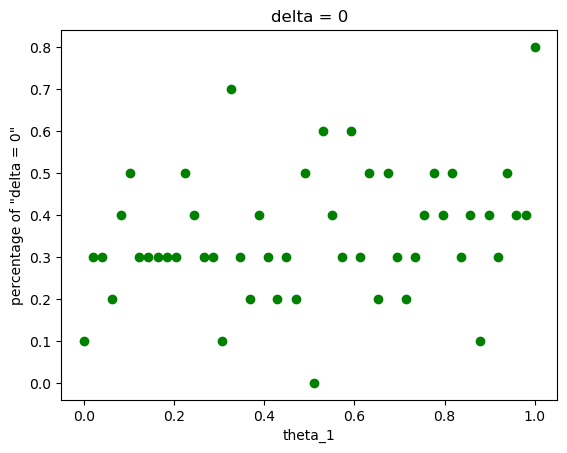

In [108]:
# As theta_1 goes from 0 to 1, plot how "delta=0" changes, and same with "star wins", 
# "branch 1 wins, fraction of 1s on branch 1", etc.

# Converts the count into a percentage
divisor = 10000//100
cnt_1_frac = [x/divisor for x in cnt_1]                       # branch 2 wins
cnt_2_frac = [x/divisor for x in cnt_2]                       # branch 3 wins
cnt_3_frac = [x/divisor for x in cnt_3]                       # branhc 1 wins
cnt_0_frac = [x/divisor for x in cnt_0]                       # delta = 0
cnt_4_frac = [(a - b)/divisor for a, b in zip(cnt_4, cnt_0)]  # star wins

plt.scatter(h1_range, cnt_0_frac, color= "green")
  
plt.xlabel('theta_1')
plt.ylabel('percentage of \"delta = 0\"')
plt.title('delta = 0')

plt.show()

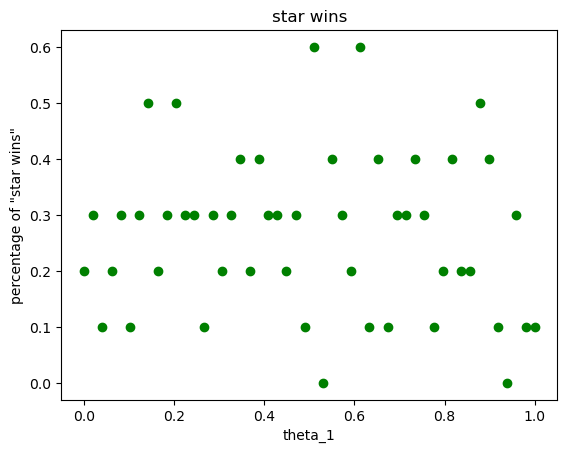

In [109]:
plt.scatter(h1_range, cnt_4_frac, color= "green")
  
plt.xlabel('theta_1')
plt.ylabel('percentage of \"star wins\"')
plt.title('star wins')

plt.show()

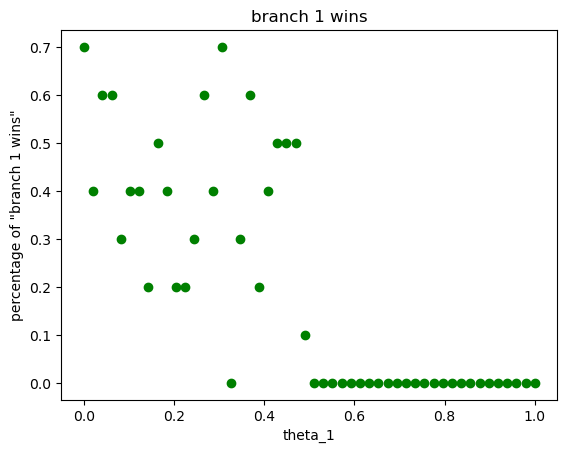

In [110]:
plt.scatter(h1_range, cnt_3_frac, color= "green")
  
plt.xlabel('theta_1')
plt.ylabel('percentage of \"branch 1 wins\"')
plt.title('branch 1 wins')

plt.show()

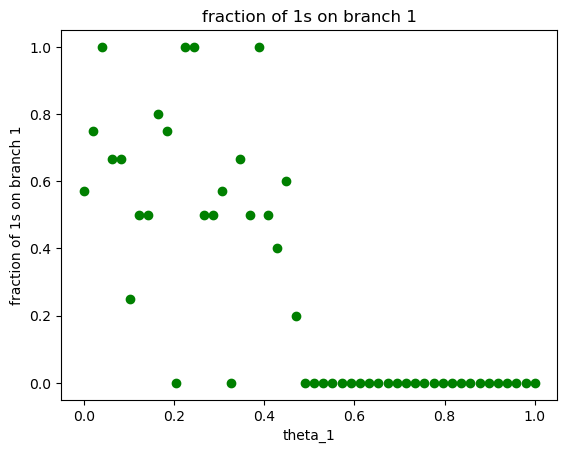

In [111]:
# When a branch wins, what fraction is 1 v. < 1?
cnt_one = [0 for element in range(50)]  
cnt_lt_one = [0 for element in range(50)]  

for u in range(50):
    for i in range(len(theta_1_unique[u])):
        if theta_1_unique[u][i] == 1:
            cnt_one[u] += 1
        else:
            cnt_lt_one[u] += 1

frac_cnt_one = []
for u in range(50):
    if len(theta_1_unique[u]) > 0: # when bracnch 1 wins
        frac_cnt_one.append(cnt_one[u]/len(theta_1_unique[u]))
    elif len(theta_1_unique[u]) == 0:
        frac_cnt_one.append(0) # when branch 1 does not win

plt.scatter(h1_range, frac_cnt_one, color= "green")
  
plt.xlabel('theta_1')
plt.ylabel('fraction of 1s on branch 1')
plt.title('fraction of 1s on branch 1')

plt.show()

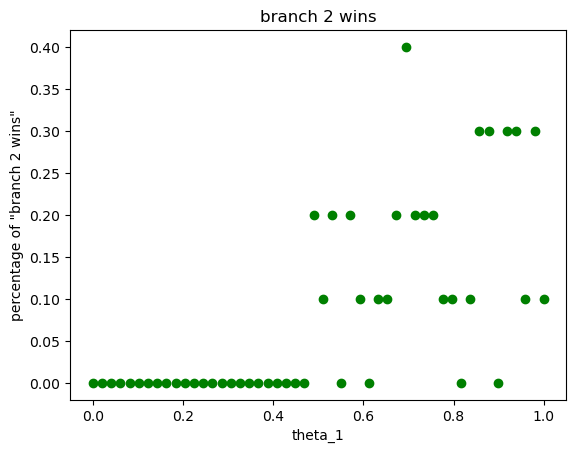

In [112]:
plt.scatter(h1_range, cnt_1_frac, color= "green")
  
plt.xlabel('theta_1')
plt.ylabel('percentage of \"branch 2 wins\"')
plt.title('branch 2 wins')

plt.show()

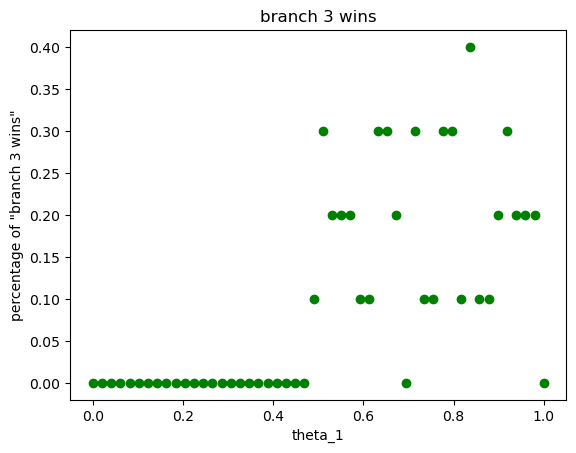

In [114]:
plt.scatter(h1_range, cnt_2_frac, color= "green")
  
plt.xlabel('theta_1')
plt.ylabel('percentage of \"branch 3 wins\"')
plt.title('branch 3 wins')

plt.show()